First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   specie

<ipython-input-5-3dca1d267cc0>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_means = df.groupby('species').mean()


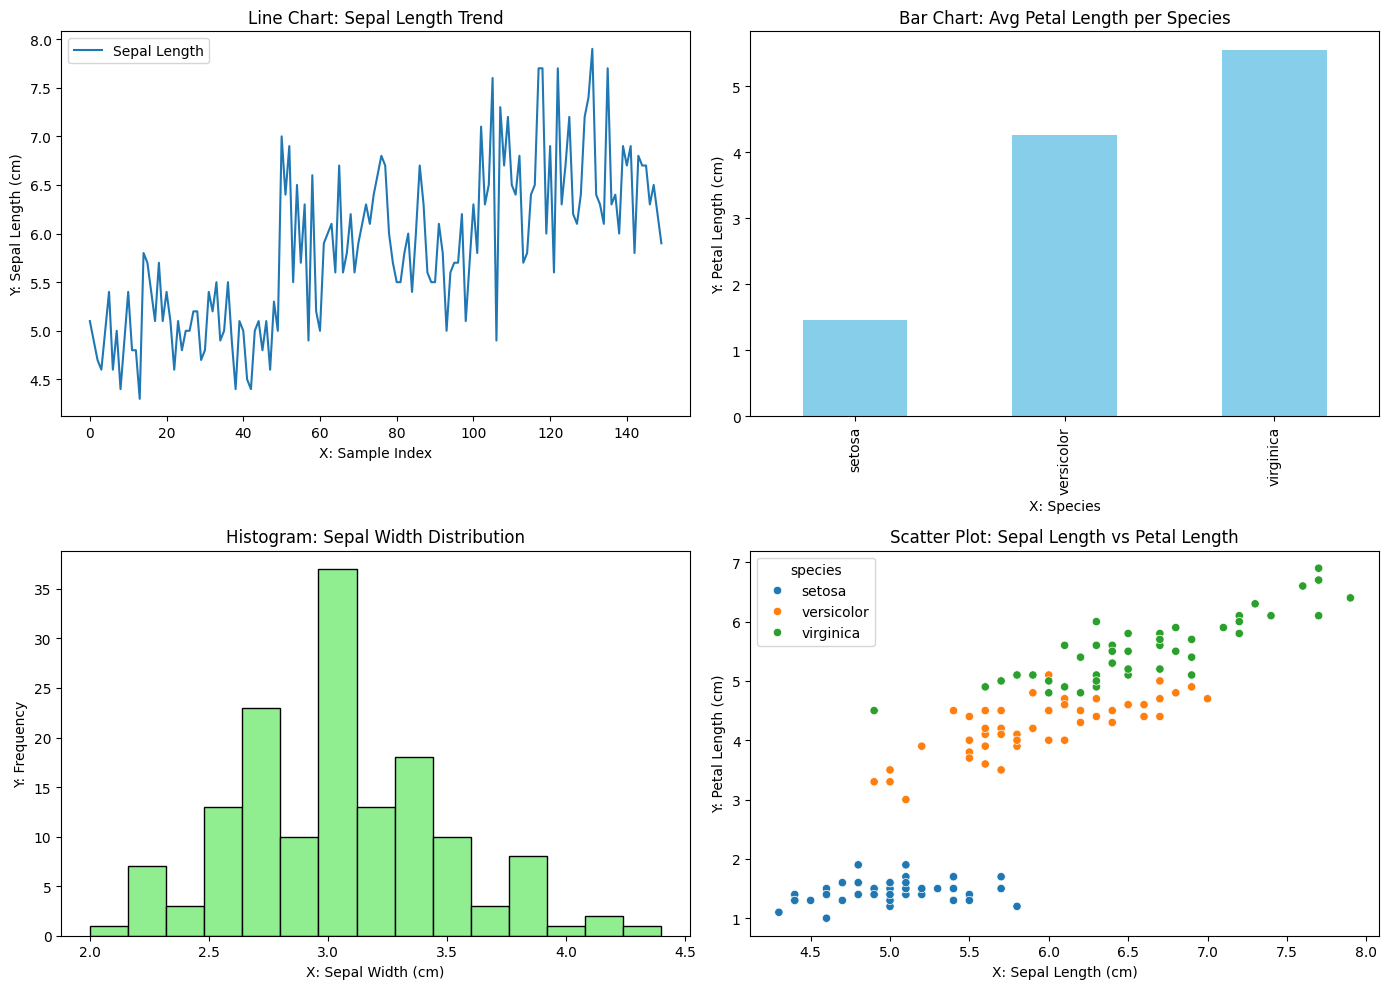


Observations:
- Setosa species has the smallest petal length on average.
- There’s a clear separation in sepal/petal measurements between species.
- The scatter plot shows a positive correlation between sepal and petal lengths.


In [5]:
# iris_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Task 1: Load and Explore the Dataset
try:
    # Load iris dataset from sklearn
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

    print("First 5 rows of the dataset:")
    print(df.head())

    print("\nDataset info:")
    print(df.info())

    print("\nChecking for missing values:")
    print(df.isnull().sum())

except FileNotFoundError:
    print("The dataset file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Task 2: Basic Data Analysis
print("\nDescriptive statistics:")
print(df.describe())

print("\nMean of numerical features grouped by species:")
grouped_means = df.groupby('species').mean()
print(grouped_means)

# Task 3: Data Visualization
plt.figure(figsize=(14, 10))

# Line Chart (showing trend of a feature across samples)
plt.subplot(2, 2, 1)
plt.plot(df['sepal length (cm)'], label='Sepal Length')
plt.title("Line Chart: Sepal Length Trend")
plt.xlabel("X: Sample Index")
plt.ylabel("Y: Sepal Length (cm)")
plt.legend()

# Bar Chart (Average petal length per species)
plt.subplot(2, 2, 2)
grouped_means['petal length (cm)'].plot(kind='bar', color='skyblue')
plt.title("Bar Chart: Avg Petal Length per Species")
plt.ylabel("Y: Petal Length (cm)")
plt.xlabel("X: Species")

# Histogram (Distribution of sepal width)
plt.subplot(2, 2, 3)
plt.hist(df['sepal width (cm)'], bins=15, color='lightgreen', edgecolor='black')
plt.title("Histogram: Sepal Width Distribution")
plt.xlabel("X: Sepal Width (cm)")
plt.ylabel("Y: Frequency")

# Scatter Plot (Sepal Length vs Petal Length)
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("X: Sepal Length (cm)")
plt.ylabel("Y: Petal Length (cm)")

plt.tight_layout()
plt.show()

# Findings
print("\nObservations:")
print("- Setosa species has the smallest petal length on average.")
print("- There’s a clear separation in sepal/petal measurements between species.")
print("- The scatter plot shows a positive correlation between sepal and petal lengths.")
